In [10]:
import scipy.stats
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import expon
from scipy.stats import norm
%matplotlib inline

In [3]:
muestra = [42, 35, 29, 45, 41, 57, 54, 47, 48, 56, 47, 35, 52, 31, 52, 55, 57, 58, 26, 29, 32, 37, 32, 34, 48, 20, 48, 51, 27, 24, 39, 40, 31, 34, 23, 24, 41, 58, 44, 48, 31, 23, 27, 55, 43, 47, 30, 57, 38, 51]
len(muestra)

50

In [4]:
 # hipótesis

media, var, skew, kurt = expon.stats(scale = 30, moments = 'mvsk')


In [6]:
# Paso 1: parametro lambda
# Paso 2: HP

mu = 30
mu > 30

# Paso 3:  mejor estimador, estimado, distribución
promedio = np.mean(muestra)
promedio

40.66

In [9]:
# Paso 4
z = (promedio - media) / np.sqrt(var/50)
z


2.5125860958161983

In [17]:
# Paso 6
alpha = 0.05

# criterios de rechazo
data_norm = norm.rvs(size = 1000000)

Text(0.5, 1.0, 'Distribución normal')

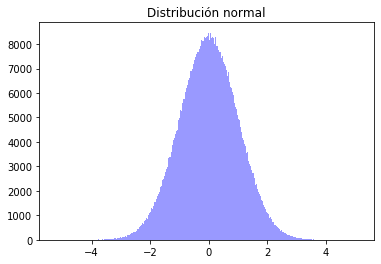

In [19]:
ax = sns.distplot(data_norm, bins = 500, kde = False, color = 'blue')
ax.set_title('Distribución normal')

In [21]:
valor_critico = norm.ppf(1-alpha, loc = 0, scale = 1)
valor_critico

1.6448536269514722

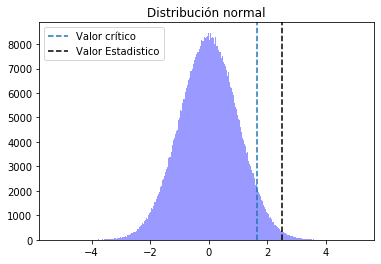

In [24]:
ax = sns.distplot(data_norm, bins = 500, kde = False, color = 'blue')
ax.set_title('Distribución normal')
ax.axvline(x = valor_critico, linestyle = '--', label = 'Valor crítico')
ax.axvline(x = z, linestyle = '--', label = 'Valor Estadistico', c = 'k')
ax.legend()

## Tipos de errores


In [36]:
mu1 = 40
mu2 = 47

promedio = np.mean(muestra)
desv = 2

z_1 = (promedio - mu1) / desv
z_2 = (promedio - mu2) / desv

In [37]:
from scipy.stats import norm
data1 = norm.rvs(loc = mu1, scale = desv ,size = 1000000)
data2 = norm.rvs(loc = mu2, scale = desv ,size = 1000000)

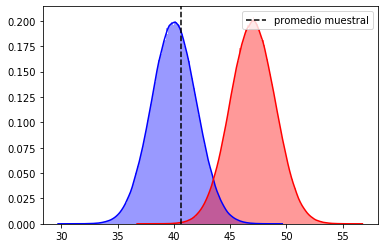

In [38]:
ax = sns.distplot(data1, bins = 500, kde = True, color= 'blue')
ax = sns.distplot(data2, bins = 500, kde = True, color= 'red')
ax.axvline(x = promedio, c = 'k', linestyle = '--', label = 'promedio muestral')
ax.legend()

In [39]:
# Error tipo 1 : p rechazar ho cuando esta es verdadera
p_prom_mu1 = norm.cdf(z_1)
1 - p_prom_mu1

0.3706999810593471

In [40]:
# Error 2: probabilidad de no rechazar ho cuando este es falsa
p_prom_mu2 = norm.cdf(z_2)
p_prom_mu2

0.0007621946880672299

## Intervalos de confianza


In [59]:
alpha = 0.0001
lim_inf = norm.ppf(alpha/2)
lim_sup = norm.ppf(1 - (alpha/2))
(lim_inf, lim_sup)


(-3.890591886413094, 3.8905918864131204)

In [60]:
promedio = np.mean(muestra)
desviacion = np.std(muestra)
data = norm.rvs(loc = promedio, scale = desviacion ,size = 1000000)
data

array([31.63661231, 57.52212128, 24.29132674, ..., 53.9519526 ,
       38.04824091, 19.37202074])

In [61]:
lim_inf = lim_inf * desviacion + promedio
lim_sup = lim_sup * desviacion + promedio

(lim_inf, lim_sup)

(-2.8632569273331114, 84.18325692733339)

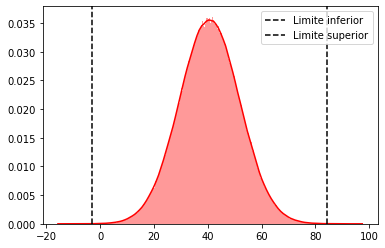

In [62]:
ax = sns.distplot(data, bins = 500, color = 'red')
ax.axvline( x = lim_inf, c='k', label='Limite inferior', linestyle = '--')
ax.axvline( x = lim_sup, c='k', label='Limite superior', linestyle = '--')
ax.legend()